# Set Up Required Libraries and Data

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Dropout

In [19]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18356293079065012090
]


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [21]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'BMKG_features.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()

,Latitude,Longitude,Depth,Magnitude,Datetime,Year,Month,Day,DayOfWeek,Hour,MagnitudeCategory,TimeDiff
0,-9.18,119.06,0.010695,0.565217,2008-11-01 21:02:43.058,2008,11,1,5,21,Low,0.000000
1,-6.55,129.64,0.010695,0.521739,2008-11-01 20:58:50.248,2008,11,1,5,20,Low,-0.064669
2,-7.01,106.63,0.159091,0.391304,2008-11-01 17:43:12.941,2008,11,1,5,17,Low,-3.260363
3,-3.30,127.85,0.010695,0.318841,2008-11-01 16:24:14.755,2008,11,1,5,16,Low,-1.316163
4,-6.41,129.54,0.090909,0.478261,2008-11-01 16:20:37.327,2008,11,1,5,16,Low,-0.060397


In [23]:
from sklearn.model_selection import train_test_split

# Selecting all columns except the target (assuming 'MagnitudeCategory' is the target)
X = data.drop(columns=['MagnitudeCategory', 'Datetime', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Day', 'TimeDiff', 'Hour', 'Month', 'DayOfWeek', 'Year'])  # Features
y = data['MagnitudeCategory']  # Target

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting the datasets to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

X_train_np, X_test_np, y_train_np, y_test_np

# Save the NumPy arrays to files
np.save('X_train_bmkg.npy', X_train_np)
np.save('X_test_bmkg.npy', X_test_np)
np.save('y_train_bmkg.npy', y_train_np)
np.save('y_test_bmkg.npy', y_test_np)

# Display the shapes of the NumPy arrays
print("X_train shape:", X_train_np.shape)
print("X_test shape:", X_test_np.shape)
print("y_train shape:", y_train_np.shape)
print("y_test shape:", y_test_np.shape)

X_train shape: (74309, 0)
X_test shape: (18578, 0)
y_train shape: (74309,)
y_test shape: (18578,)


In [15]:
# Define the CNN-GRU model architecture
def create_cnn_gru_model(input_shape):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))

    # GRU Layer
    model.add(GRU(units=64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(GRU(units=32))

    # Dense Layers
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='linear'))  # Output layer for regression task

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

In [11]:
# convert data from csv to numpy array
X_train_bmkg = pd.read_csv("X_train_bmkg.csv")
X_test_bmkg = pd.read_csv("X_test_bmkg.csv")
y_train_bmkg = pd.read_csv("y_train_bmkg.csv")
y_test_bmkg = pd.read_csv("y_test_bmkg.csv")

X_train_jma = pd.read_csv("X_train_jma.csv")
X_test_jma = pd.read_csv("X_test_jma.csv")
y_train_jma = pd.read_csv("y_train_jma.csv")
y_test_jma = pd.read_csv("y_test_jma.csv")

X_train_bmkg = X_train_bmkg.values
X_test_bmkg = X_test_bmkg.values
y_train_bmkg = y_train_bmkg.values
y_test_bmkg = y_test_bmkg.values

X_train_jma = X_train_jma.values
X_test_jma = X_test_jma.values
y_train_jma = y_train_jma.values
y_test_jma = y_test_jma.values

# Display the first few rows of each dataset to verify
print("BMKG Training Data (X_train_bmkg):")
print(X_train_bmkg)
print("\nBMKG Training Labels (y_train_bmkg):")
print(y_train_bmkg)

print("\nJMA Training Data (X_train_jma):")
print(X_train_jma)
print("\nJMA Training Labels (y_train_jma):")
print(y_train_jma)

# save the data
np.save('X_train_bmkg.npy', X_train_bmkg)
np.save('X_test_bmkg.npy', X_test_bmkg)
np.save('y_train_bmkg.npy', y_train_bmkg)
np.save('y_test_bmkg.npy', y_test_bmkg)

np.save('X_train_jma.npy', X_train_jma)
np.save('X_test_jma.npy', X_test_jma)
np.save('y_train_jma.npy', y_train_jma)
np.save('y_test_jma.npy', y_test_jma)

BMKG Training Data (X_train_bmkg):
[[-4.64000000e+00  1.01990000e+02  1.20320856e-02  5.36231884e-01]
 [-6.89000000e+00  1.30030000e+02  1.75133690e-01  4.49275362e-01]
 [-2.41000000e+00  1.26870000e+02  1.06951872e-02  4.63768116e-01]
 ...
 [-9.21000000e+00  1.21300000e+02  1.27005348e-01  4.05797101e-01]
 [ 1.34000000e+00  9.67600000e+01  9.62566845e-02  3.91304348e-01]
 [-5.10000000e+00  1.14830000e+02  1.85828877e-01  5.65217391e-01]]

BMKG Training Labels (y_train_bmkg):
[[0.53623188]
 [0.44927536]
 [0.46376812]
 ...
 [0.4057971 ]
 [0.39130435]
 [0.56521739]]

JMA Training Data (X_train_jma):
[[ 38.925      141.66166667  65.           3.7       ]
 [ 37.28333333 140.00166667   9.           2.1       ]
 [ 38.34166667 141.62833333  55.           3.9       ]
 ...
 [ 42.635      141.95333333  29.           3.6       ]
 [ 34.65333333 139.42         3.           4.2       ]
 [ 42.51833333 140.84333333   7.           2.3       ]]

JMA Training Labels (y_train_jma):
[[3.7]
 [2.1]
 [3.9]
 .

In [12]:
print("X_train_bmkg shape:", X_train_bmkg.shape)
print("X_test_bmkg shape:", X_test_bmkg.shape)
print("y_train_bmkg shape:", y_train_bmkg.shape)
print("y_test_bmkg shape:", y_test_bmkg.shape)

print("X_train_jma shape:", X_train_jma.shape)
print("X_test_jma shape:", X_test_jma.shape)
print("y_train_jma shape:", y_train_jma.shape)
print("y_test_jma shape:", y_test_jma.shape)

X_train_bmkg shape: (74309, 4)
X_test_bmkg shape: (18578, 4)
y_train_bmkg shape: (74309, 1)
y_test_bmkg shape: (18578, 1)
X_train_jma shape: (68267, 4)
X_test_jma shape: (17067, 4)
y_train_jma shape: (68267, 1)
y_test_jma shape: (17067, 1)


In [13]:
# Reshape the input data to add a timestep dimension
X_train_bmkg = X_train_bmkg.reshape(X_train_bmkg.shape[0], 1, X_train_bmkg.shape[1])  # (samples, timesteps, features)
X_test_bmkg = X_test_bmkg.reshape(X_test_bmkg.shape[0], 1, X_test_bmkg.shape[1])      # (samples, timesteps, features)
X_train_jma = X_train_jma.reshape(X_train_jma.shape[0], 1, X_train_jma.shape[1])      # (samples, timesteps, features)
X_test_jma = X_test_jma.reshape(X_test_jma.shape[0], 1, X_test_jma.shape[1])          # (samples, timesteps, features)

# Print the new shapes
print("X_train_bmkg reshaped:", X_train_bmkg.shape)  # Expected: (74309, 1, 4)
print("X_test_bmkg reshaped:", X_test_bmkg.shape)    # Expected: (18578, 1, 4)
print("X_train_jma reshaped:", X_train_jma.shape)    # Expected: (68267, 1, 4)
print("X_test_jma reshaped:", X_test_jma.shape)      # Expected: (17067, 1, 4)

X_train_bmkg reshaped: (74309, 1, 4)
X_test_bmkg reshaped: (18578, 1, 4)
X_train_jma reshaped: (68267, 1, 4)
X_test_jma reshaped: (17067, 1, 4)


In [16]:
# Load preprocessed datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load features and labels
X_train_bmkg = np.load('X_train_bmkg.npy')  # Replace with your file path
X_test_bmkg = np.load('X_test_bmkg.npy')
y_train_bmkg = np.load('y_train_bmkg.npy')
y_test_bmkg = np.load('y_test_bmkg.npy')

# Get input shape for model
input_shape_bmkg = (X_train_bmkg.shape[1], X_train_bmkg.shape[2])  # (timesteps, features)

# Build the model
cnn_gru_model_bmkg = create_cnn_gru_model(input_shape_bmkg)

# Train the model
history_bmkg = cnn_gru_model_bmkg.fit(
    X_train_bmkg, y_train_bmkg,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)


IndexError: tuple index out of range

In [17]:
input_shape = (X_train_bmkg.shape[1], X_train_bmkg.shape[2])

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
model.add(GRU(64, return_sequences=False))  # Final GRU outputs 2D
model.add(Dense(1, activation='linear'))  # Final output layer

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

# Train the model
history = model.fit(
    X_train_bmkg,
    y_train_bmkg,
    validation_data=(X_test_bmkg, y_test_bmkg),
    epochs=20,
    batch_size=32
)

IndexError: tuple index out of range

In [ ]:
# Evaluate the model
test_loss_bmkg, test_mae_bmkg = cnn_gru_model_bmkg.evaluate(X_test_bmkg, y_test_bmkg, verbose=1)

print(f"BMKG Dataset - Test Loss (MSE): {test_loss_bmkg}, Test MAE: {test_mae_bmkg}")

# Plot the training history
import matplotlib.pyplot as plt

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history_bmkg.history['loss'], label='Train Loss')
plt.plot(history_bmkg.history['val_loss'], label='Validation Loss')
plt.title('BMKG CNN-GRU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# MAE Plot
plt.figure(figsize=(10, 5))
plt.plot(history_bmkg.history['mae'], label='Train MAE')
plt.plot(history_bmkg.history['val_mae'], label='Validation MAE')
plt.title('BMKG CNN-GRU Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Visualize Training Performance

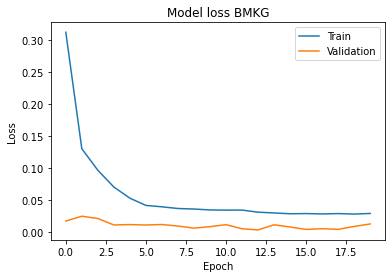

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss BMKG')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


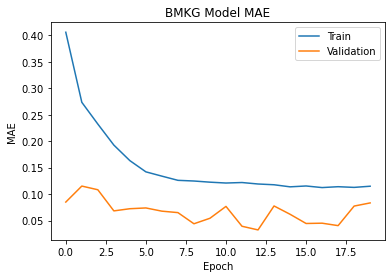

In [15]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('BMKG Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [10]:
# Train the CNN-GRU model on JMA data
input_shape = (X_train_jma.shape[1], X_train_jma.shape[2])
cnn_gru_model = build_cnn_gru_model(input_shape)
history = cnn_gru_model.fit(
    X_train_jma, y_train_jma,
    epochs=20,            # Adjust based on performance
    batch_size=32,        # Can be tuned
    validation_data=(X_test_jma, y_test_jma),
    verbose=1
)


Train on 68267 samples, validate on 17067 samples
Epoch 1/20
68267/68267 [==============================] - 7s 109us/sample - loss: 0.3119 - mae: 0.4060 - val_loss: 0.0168 - val_mae: 0.0849
Epoch 2/20
68267/68267 [==============================] - 6s 87us/sample - loss: 0.1300 - mae: 0.2735 - val_loss: 0.0244 - val_mae: 0.1151
Epoch 3/20
68267/68267 [==============================] - 6s 87us/sample - loss: 0.0962 - mae: 0.2324 - val_loss: 0.0208 - val_mae: 0.1082
Epoch 4/20
68267/68267 [==============================] - 6s 90us/sample - loss: 0.0700 - mae: 0.1926 - val_loss: 0.0107 - val_mae: 0.0682
Epoch 5/20
68267/68267 [==============================] - 6s 89us/sample - loss: 0.0526 - mae: 0.1632 - val_loss: 0.0113 - val_mae: 0.0723
Epoch 6/20
68267/68267 [==============================] - 6s 89us/sample - loss: 0.0413 - mae: 0.1420 - val_loss: 0.0107 - val_mae: 0.0738
Epoch 7/20
68267/68267 [==============================] - 6s 90us/sample - loss: 0.0391 - mae: 0.1339 - val_loss: 0

In [16]:
# Evaluate on JMA test set
test_loss, test_mae = cnn_gru_model.evaluate(X_test_jma, y_test_jma, verbose=0)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

Test Loss (MSE): 0.012322406124024788
Test MAE: 0.08327645063400269


In [22]:
# the accuracy percentage of the model on JMA data
print(f"Accuracy: {100 - test_mae}")

Accuracy: 99.916723549366


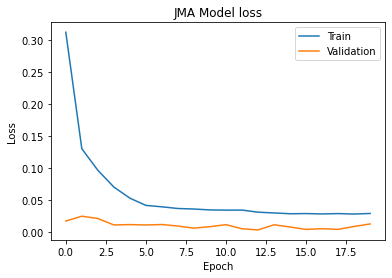

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('JMA Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

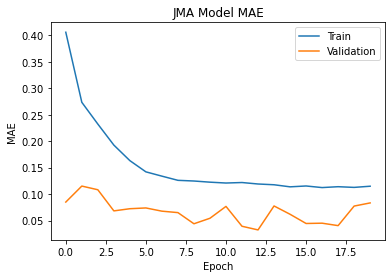

In [18]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('JMA Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()